In [139]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize =2
        self.outputLayerSize=1
        self.hiddenLayerSize=3

        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        # LOSS FUNCTION
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    ### ADDING CODE FOR RELU COST FUNCTION
    def reluForward(self, X):
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.relu(self.z3)
        return yHat
    
    def reluCostFunction(self, X, y):
        self.yHat=self.reluForward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def reluCostFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.reluForward(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

In [140]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [141]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [142]:
y

array([[75.],
       [80.],
       [93.]])

In [143]:
X=X/np.amax(X,axis=0)
y=y/100

In [144]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [145]:
NN=Neural_Network()

In [146]:
yH=NN.forward(X)

In [147]:
yH

array([[0.61708294],
       [0.6028879 ],
       [0.61432458]])

In [148]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

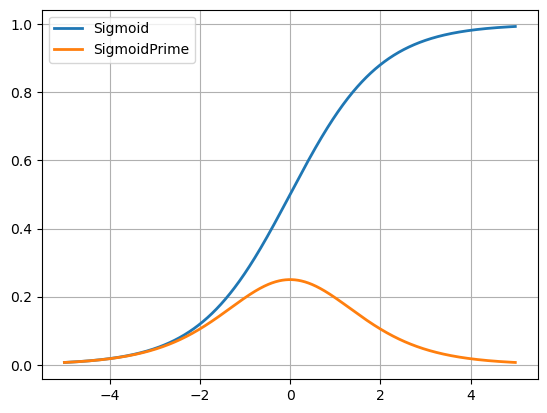

In [149]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])
#u=NN.sigmoidPrime(testValues)


In [150]:
NN=Neural_Network()

In [151]:
cost1=NN.costFunction(X,y)

In [152]:
cost1

array([0.03943792])

In [153]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [154]:
dJdW1

array([[-0.01264995, -0.00701021, -0.0009191 ],
       [-0.00462198, -0.00268957, -0.00036442]])

In [155]:
dJdW2

array([[-0.05420626],
       [-0.05901701],
       [-0.06035232]])

In [156]:
scalar=3
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.03943792] [0.08052476]


In [157]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.08052476] [0.03943792]


In [158]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost4 = NN.costFunction(X,y)
print (cost3,cost4)

[0.03943792] [0.01733971]


In [159]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost5 = NN.costFunction(X,y)
print (cost4,cost5)

[0.01733971] [0.00936857]


## Problem 1: Understand the structure of a neural network (50 points).


In [160]:
# put cost in initial
# 100 iteration
# each time calculate cost, take the derivative again
# keep scalar the same

NN_p1=Neural_Network()
scalar = 0.1
accuracy_p1 = []
costs_p1 = []
for i in np.arange(0,100):

    dJdW1,dJdW2 = NN_p1.costFunctionPrime(X,y)
    
    NN_p1.W1 = NN_p1.W1 - scalar*dJdW1
    NN_p1.W2 = NN_p1.W2 - scalar*dJdW2
    
    cost_i_p1 = NN_p1.costFunction(X,y)
    costs_p1 += [cost_i_p1]
    
    yHat_p1 = NN_p1.yHat
    accuracy_p1 += [1 - np.mean(np.abs(yHat_p1 - y))]


### a) Write a program that minimizes the cost function to a given accuracy set in advance by you. Accuracy simply means a given threshold that is reasonable and you think your program could reach, for example 0.1% of the target.

Text(0.5, 1.0, 'Accuracy vs. Iteration Number with scalar = 0.1')

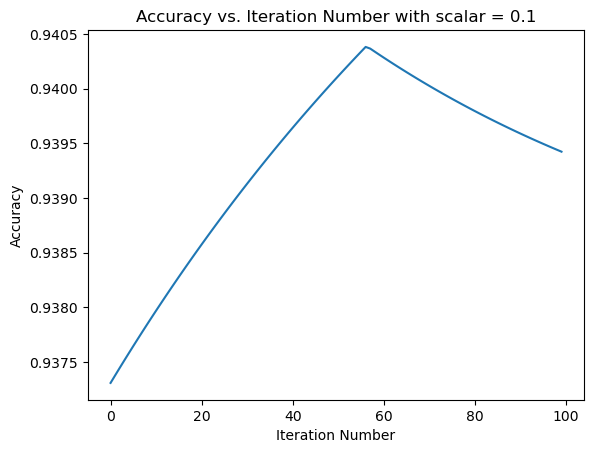

In [161]:
plt.plot(np.arange(0, 100), accuracy_p1)
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration Number with scalar = 0.1')

### b) Plot the Cost vs. Iteration and see if you get a similar convex parabolic figure. The `scalar` is a parameter that allows to change the step of the iteration. Some people call this the learning rate. Explore what happens if the learning rate is unusually large.

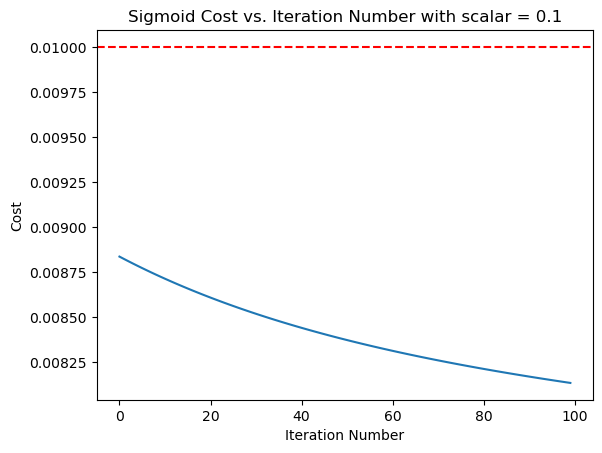

In [162]:
plt.plot(np.arange(0, 100), costs_p1)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Sigmoid Cost vs. Iteration Number with scalar = 0.1')
plt.axhline(0.01, color='r',linestyle='--')

In [163]:
if costs_p1[len(costs_p1)-1] <= 0.01:
    print('Reaches accuracy threshold!')
else:
    print('Does not reach accuracy threshold.')

Reaches accuracy threshold!


In [164]:
NN_sig2=Neural_Network()
scalar = 0.25
costs_sig2 = []
for i in np.arange(0,100):
    dJdW1_sig2,dJdW2_sig2=NN_sig2.costFunctionPrime(X,y)
    cost_i_sig2 = NN_sig2.costFunction(X,y)
    costs_sig2 += [cost_i_sig2] 
    NN_sig2.W1 = NN_sig2.W1-scalar*dJdW1_sig2
    NN_sig2.W2 = NN_sig2.W2-scalar*dJdW2_sig2

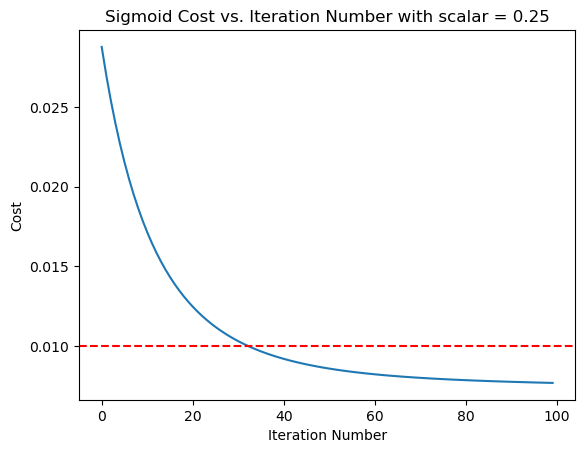

In [165]:
plt.plot(np.arange(0,100), costs_sig2)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Sigmoid Cost vs. Iteration Number with scalar = 0.25')
plt.axhline(0.01, color='r',linestyle='--')

In [166]:
if costs_sig2[len(costs_sig2)-1] <= 0.01:
    print('Reaches accuracy threshold!')
else:
    print('Does not reach accuracy threshold.')

Reaches accuracy threshold!


In [167]:
NN_sig3=Neural_Network()
costs_sig3 = []
scalar = 2
for i in np.arange(0,100):
    dJdW1_sig3,dJdW2_sig3=NN_sig3.costFunctionPrime(X,y)
    cost_i_sig3 = NN_sig3.costFunction(X,y)
    costs_sig3 += [cost_i_sig3] 
    NN_sig3.W1 = NN_sig3.W1-scalar*dJdW1_sig3
    NN_sig3.W2 = NN_sig3.W2-scalar*dJdW2_sig3

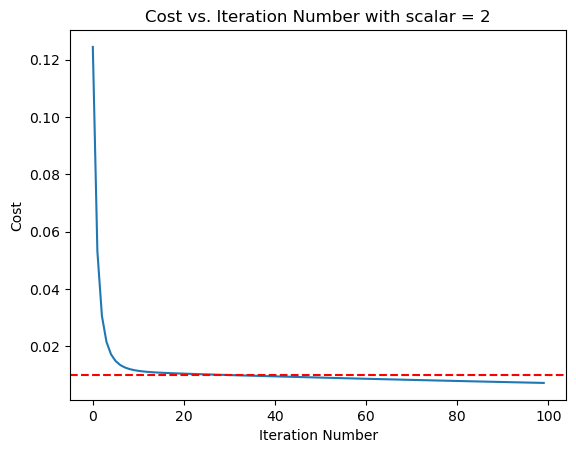

In [168]:
plt.plot(np.arange(0,100), costs_sig3)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration Number with scalar = 2')
plt.axhline(0.01, color='r',linestyle='--')

In [169]:
if costs_sig3[len(costs_sig3)-1] <= 0.01:
    print('Reaches accuracy threshold!')
else:
    print('Does not reach accuracy threshold.')

Reaches accuracy threshold!


# Probelm 2: Use ReLu instead of sigmoid activation (50 points).

## a) Use the ReLu activation function instead of the sigmoid function. 

In [170]:
NN = Neural_Network()

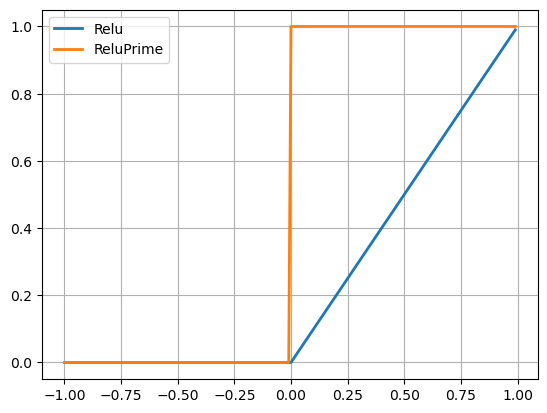

In [171]:
testValues=np.arange(-1,1,0.01)
plt.plot(testValues,NN.relu(testValues),linewidth=2)
plt.plot(testValues, NN.reluPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Relu','ReluPrime'])


## b) Compare how fast this neural network works with the one that uses the sigmoid function activation. 



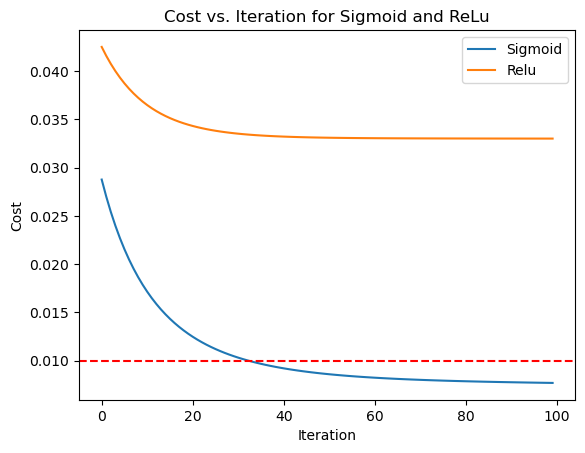

In [175]:
NN_relu1=Neural_Network()

scalar = 0.01
costs_relu1 = []
for i in np.arange(0,100):
    dJdW1_relu1,dJdW2_relu1=NN_relu1.reluCostFunctionPrime(X,y)
    cost_i_relu1 = NN_relu1.reluCostFunction(X,y)
    costs_relu1 += [cost_i_relu1] 
    NN_relu1.W1 = NN_relu1.W1-scalar*dJdW1_relu1
    NN_relu1.W2 = NN_relu1.W2-scalar*dJdW2_relu1

plt.plot(np.arange(0, 100), costs_sig2)
plt.plot(np.arange(0, 100), costs_relu1)
plt.legend(['Sigmoid', 'Relu'])
plt.title('Cost vs. Iteration for Sigmoid and ReLu')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.axhline(0.01, color='r', linestyle='--')

Text(0.5, 1.0, 'ReluPrime and SigmoidPrime to compare how fast')

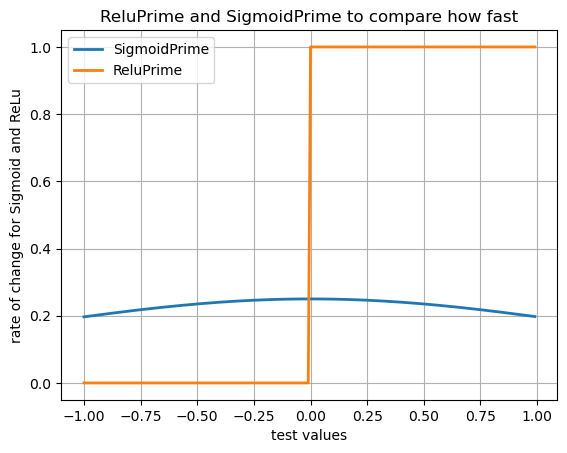

In [176]:
testValues=np.arange(-1,1,0.01)
plt.plot(testValues,NN.sigmoidPrime(testValues),linewidth=2)
plt.plot(testValues, NN.reluPrime(testValues),linewidth=2)
plt.xlabel('test values')
plt.ylabel('rate of change for Sigmoid and ReLu')
plt.grid(1)
plt.legend(['SigmoidPrime','ReluPrime'])
plt.title('ReluPrime and SigmoidPrime to compare how fast')

## c) Compare ReLu with 1 hidden layer with ReLu with 2 hidden layers

In [185]:
class Neural_Network_h2(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize =2
        self.outputLayerSize=1
        self.hiddenLayer1Size=3
        self.hiddenLayer2Size=3

        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size,self.outputLayerSize)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    
    ### ADDING CODE FOR RELU COST FUNCTION
    def reluForward(self, X):
        self.z1 = np.dot(X,self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1,self.W2)
        #added
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W3)
        yHat = self.relu(self.z3)
        return yHat
    
    def reluCostFunction(self, X, y):
        self.yHat=self.reluForward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def reluCostFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.reluForward(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW3=np.dot(self.a2.T, delta3)
        delta2=np.dot(delta3,self.W3.T)*self.reluPrime(self.z2)
        dJdW2=np.dot(self.a1.T,delta2)
        delta1=np.dot(delta2,self.W2.T)*self.reluPrime(self.z1)
        dJdW1=np.dot(X.T,delta1)
        return dJdW1,dJdW2

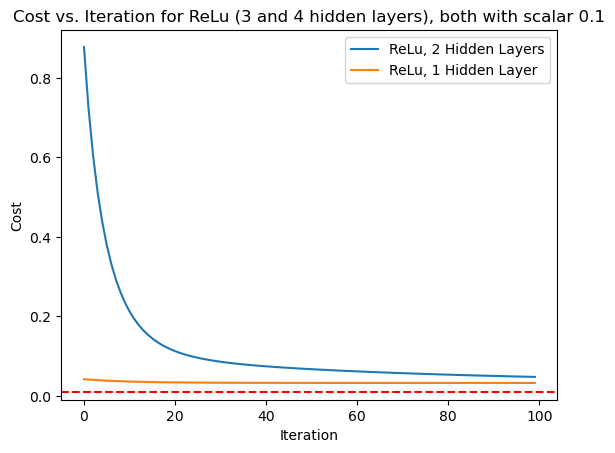

In [190]:
NN_relu2 = Neural_Network_h2()
scalar = 0.01
costs_relu2=[]
for i in np.arange(0,100):
    dJdW1_relu2,dJdW2_relu2=NN_relu2.reluCostFunctionPrime(X,y)
    cost_i_relu2 = NN_relu2.reluCostFunction(X,y)
    costs_relu2 += [cost_i_relu2] 
    NN_relu2.W1 = NN_relu2.W1-scalar*dJdW1_relu2
    NN_relu2.W2 = NN_relu2.W2-scalar*dJdW2_relu2
    
plt.plot(np.arange(0, 100), costs_relu2)
plt.plot(np.arange(0, 100), costs_relu1)
plt.legend(['ReLu, 2 Hidden Layers', 'ReLu, 1 Hidden Layer'])
plt.title('Cost vs. Iteration for ReLu (3 and 4 hidden layers), both with scalar 0.1')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.axhline(0.01, color='r', linestyle='--')

## d) Compare with 2  hidden layers with 10 nodes.

Text(0, 0.5, 'Cost')

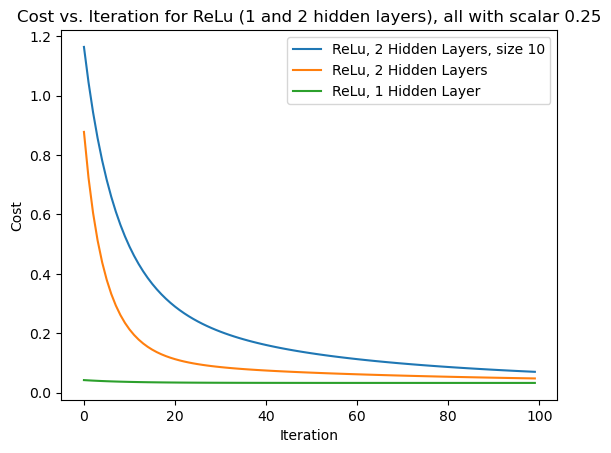

In [197]:
NN_relu3 = Neural_Network_h2()
NN_relu3.hiddenLayer1Size = 10
NN_relu3.hiddenLayer2Size = 10
scalar = 0.01
costs_relu3=[]
for i in np.arange(0,100):
    dJdW1_relu3,dJdW2_relu3=NN_relu3.reluCostFunctionPrime(X,y)
    cost_i_relu3 = NN_relu3.reluCostFunction(X,y)
    costs_relu3 += [cost_i_relu3] 
    NN_relu3.W1 = NN_relu3.W1-scalar*dJdW1_relu3
    NN_relu3.W2 = NN_relu3.W2-scalar*dJdW2_relu3
    
plt.plot(np.arange(0, 100), costs_relu3)
plt.plot(np.arange(0, 100), costs_relu2)
plt.plot(np.arange(0, 100), costs_relu1)


plt.legend(['ReLu, 2 Hidden Layers, size 10','ReLu, 2 Hidden Layers', 'ReLu, 1 Hidden Layer'])
plt.title('Cost vs. Iteration for ReLu (1 and 2 hidden layers), all with scalar 0.25')
plt.xlabel('Iteration')
plt.ylabel('Cost')